In [14]:
from google.colab import files
uploaded=files.upload()

Saving Judgment_Embeddings_InLegalBERT.xlsx to Judgment_Embeddings_InLegalBERT (1).xlsx


Entropy of the dataset: 2.580022053909851
Gini Index of the dataset: 0.7573491280485835
Best Root Node Feature: feature_1
Information Gain of Each Feature: {'feature_0': 2.5750669594533626, 'feature_1': 2.5756863462604236, 'feature_2': 2.5756863462604236, 'feature_3': 2.5756863462604236, 'feature_4': 2.5744475726463016, 'feature_5': 2.5756863462604236, 'feature_6': 2.5756863462604236, 'feature_7': 2.5756863462604236, 'feature_8': 2.5750669594533626, 'feature_9': 2.5756863462604236, 'feature_10': 2.5756863462604236, 'feature_11': 2.5750669594533626, 'feature_12': 2.5756863462604236, 'feature_13': 2.5756863462604236, 'feature_14': 2.5750669594533626, 'feature_15': 2.5756863462604236, 'feature_16': 2.5756863462604236, 'feature_17': 2.5750669594533626, 'feature_18': 2.5756863462604236, 'feature_19': 2.5756863462604236, 'feature_20': 2.5756863462604236, 'feature_21': 2.5756863462604236, 'feature_22': 2.5756863462604236, 'feature_23': 2.5750669594533626, 'feature_24': 2.5750669594533626, 'fe

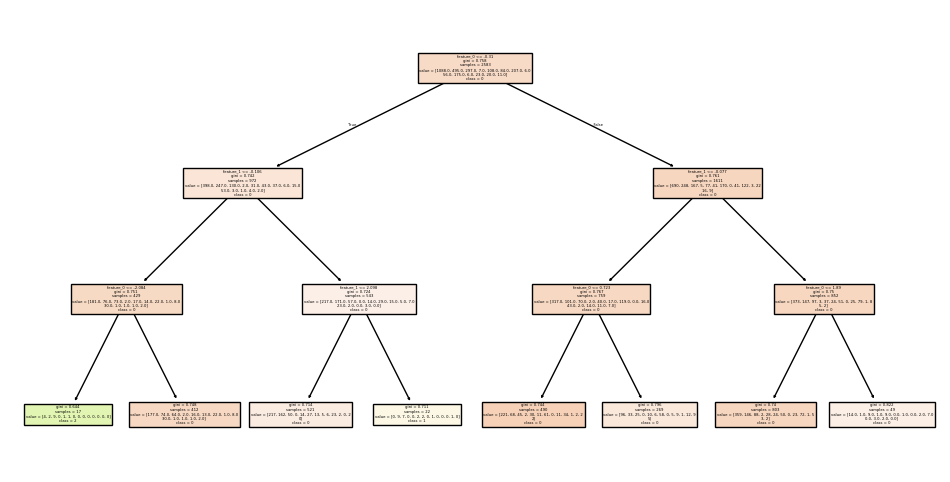

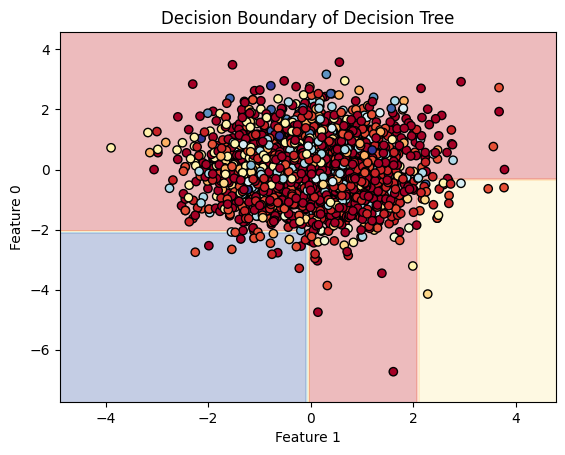

In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
def load_dataset(file_path):
    return pd.read_excel(file_path)

# A1: Calculate Entropy
def calculate_entropy(data, target_column):
    target_values = data[target_column]
    total_count = len(target_values)
    value_counts = Counter(target_values)
    entropy_value = -sum((count / total_count) * math.log2(count / total_count)
                         for count in value_counts.values() if count > 0)
    return entropy_value

# A2: Calculate Gini Index
def calculate_gini(data, target_column):
    target_values = data[target_column]
    total_count = len(target_values)
    value_counts = Counter(target_values)
    gini_index = 1 - sum((count / total_count) ** 2 for count in value_counts.values())
    return gini_index

# A3: Calculate Information Gain
def information_gain(data, target_column, feature_column):
    total_entropy = calculate_entropy(data, target_column)
    unique_values = data[feature_column].unique()
    weighted_entropy = sum(
        (len(data[data[feature_column] == value]) / len(data)) *
        calculate_entropy(data[data[feature_column] == value], target_column)
        for value in unique_values
    )
    return total_entropy - weighted_entropy

# A3: Find Best Root Node
def find_best_root_node(data, target_column):
    feature_columns = [col for col in data.columns if col != target_column]
    ig_values = {feature: information_gain(data, target_column, feature) for feature in feature_columns}
    best_feature = max(ig_values, key=ig_values.get)
    return best_feature, ig_values

# A4: Apply Binning (Equal-Width or Equal-Frequency)
def apply_binning(df, column_name, bins=4, method="equal-width"):
    df = df.dropna(subset=[column_name])  # Remove missing values
    if method == "equal-width":
        df["binned_feature"], bins_edges = pd.cut(df[column_name], bins=bins, labels=False, retbins=True)
    else:  # Equal-Frequency
        df["binned_feature"], bins_edges = pd.qcut(df[column_name], q=bins, labels=False, retbins=True)
    return df, bins_edges

# A5: Train Decision Tree
def train_decision_tree(X, y, max_depth=3):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, y)
    return tree

# A6: Visualize Decision Tree
def visualize_decision_tree(tree, feature_names, class_names):
    plt.figure(figsize=(12, 6))
    plot_tree(tree, feature_names=feature_names, class_names=[str(cls) for cls in class_names], filled=True)
    plt.show()

# A7: Plot Decision Boundaryv
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 0')
    plt.title('Decision Boundary of Decision Tree')
    plt.show()

file_path = "Judgment_Embeddings_InLegalBERT.xlsx"

# Load dataset
df = load_dataset(file_path)

# Specify target variable
target_column = "Label"
feature_columns = ["feature_1", "feature_0"]

# A1 & A2: Compute Entropy and Gini Index
entropy_result = calculate_entropy(df, target_column)
gini_result = calculate_gini(df, target_column)

print("Entropy of the dataset:", entropy_result)
print("Gini Index of the dataset:", gini_result)

# A3: Find Best Root Node
best_root_feature, ig_scores = find_best_root_node(df, target_column)
print("Best Root Node Feature:", best_root_feature)
print("Information Gain of Each Feature:", ig_scores)

# A4: Apply Binning to a Continuous Feature
df, bin_edges = apply_binning(df, best_root_feature, bins=4, method="equal-width")

# Prepare Data for Model Training
X = df[feature_columns].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree
dt = train_decision_tree(X_train, y_train)

# A6: Visualize Decision Tree
visualize_decision_tree(dt, feature_columns, df[target_column].unique())

# A7: Plot Decision Boundary
plot_decision_boundary(dt, X_train, y_train)